In [1]:
from google.colab import files
uploaded = files.upload()

Saving DOGE-USD.csv to DOGE-USD.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("DOGE-USD.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


In [5]:
df.shape

(2458, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2.454000e+03
mean,0.012314,0.013622,0.011071,0.012439,0.012439,4.566342e+08
std,0.059966,0.067318,0.052687,0.060335,0.060335,2.955614e+09
min,0.000087,0.000089,0.000085,0.000087,0.000087,1.669500e+04
25%,0.000225,0.000230,0.000221,0.000225,0.000225,2.365995e+05
50%,0.002076,0.002119,0.002035,0.002080,0.002080,9.604330e+06
75%,0.003039,0.003143,0.002917,0.003042,0.003042,5.618581e+07
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [7]:
df.info

<bound method DataFrame.info of             Date      Open      High  ...     Close  Adj Close        Volume
0     2014-09-17  0.000293  0.000299  ...  0.000268   0.000268  1.463600e+06
1     2014-09-18  0.000268  0.000325  ...  0.000298   0.000298  2.215910e+06
2     2014-09-19  0.000298  0.000307  ...  0.000277   0.000277  8.835630e+05
3     2014-09-20  0.000276  0.000310  ...  0.000292   0.000292  9.930040e+05
4     2014-09-21  0.000293  0.000299  ...  0.000288   0.000288  5.391400e+05
...          ...       ...       ...  ...       ...        ...           ...
2453  2021-06-05  0.376752  0.393886  ...  0.372177   0.372177  3.464039e+09
2454  2021-06-06  0.371676  0.376798  ...  0.371807   0.371807  1.836611e+09
2455  2021-06-07  0.371566  0.379678  ...  0.331050   0.331050  3.043975e+09
2456  2021-06-08  0.331822  0.341435  ...  0.327687   0.327687  3.918488e+09
2457  2021-06-09  0.327762  0.327762  ...  0.318597   0.318597  3.452242e+09

[2458 rows x 7 columns]>

In [8]:
fig = go.Figure(data=[go.Candlestick(
    x = df.index,
    open = df['Open'],
    close = df["Close"],
    high = df["High"],
    low = df['Low'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red'
)])
fig.show()

In [9]:
maximum_price = df["Close"].max()
minimum_price = df["Close"].min()
difference = maximum_price - minimum_price
first_level = maximum_price - difference * 0.236
second_level = maximum_price - difference * 0.382
third_level = maximum_price - difference * 0.5
fourth_level = maximum_price - difference * 0.618

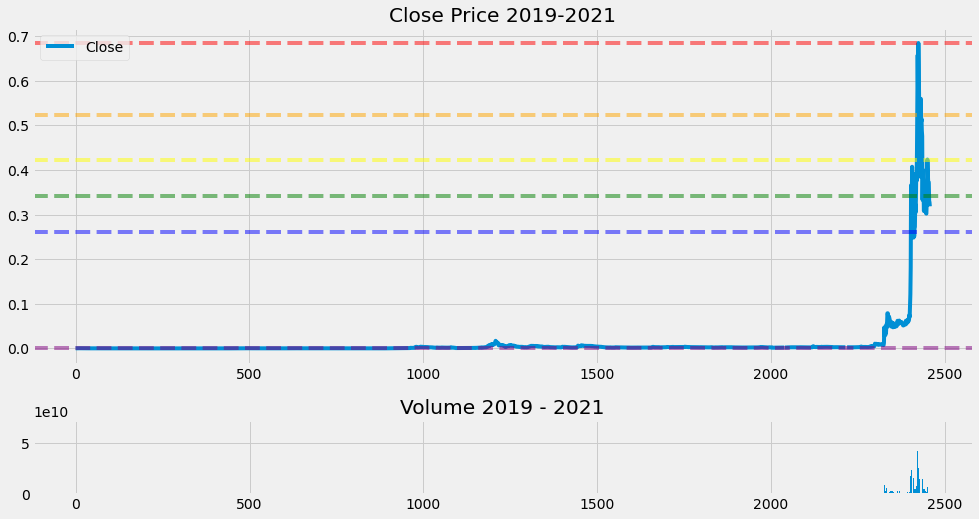

In [10]:
top = plt.subplot2grid( (4,4), (0,0), rowspan=3, colspan=4)
top.plot(df.index, df["Close"], label = "Close")
top.axhline(maximum_price, linestyle="--", alpha=0.5, color='red')
top.axhline(first_level, linestyle="--", alpha=0.5, color='orange')
top.axhline(second_level, linestyle="--", alpha=0.5, color='yellow')
top.axhline(third_level, linestyle="--", alpha=0.5, color='green')
top.axhline(fourth_level, linestyle="--", alpha=0.5, color='blue')
top.axhline(minimum_price, linestyle="--", alpha=0.5, color='purple')
plt.title("Close Price 2019-2021")
plt.legend(loc="upper left")
bottom = plt.subplot2grid( (4,4), (3,0), rowspan=1, colspan=4)
plt.title("Volume 2019 - 2021")
bottom.bar(df.index, df["Volume"])
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

In [11]:
DSR = df["Close"].pct_change(1)
DSR

0            NaN
1       0.111940
2      -0.070470
3       0.054152
4      -0.013699
          ...   
2453   -0.011017
2454   -0.000994
2455   -0.109619
2456   -0.010159
2457   -0.027740
Name: Close, Length: 2458, dtype: float64

In [12]:
DSR.describe()

count    2457.000000
mean        0.005904
std         0.092539
min        -0.402570
25%        -0.021371
50%         0.000000
75%         0.019114
max         2.756432
Name: Close, dtype: float64

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text major ticklabel objects>)

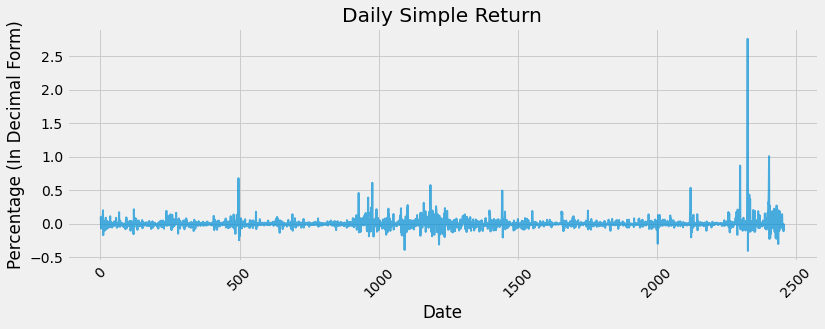

In [13]:
plt.figure(figsize=(12,4))
plt.plot(DSR.index, DSR, label="Close", lw=2, alpha=0.7)
plt.title("Daily Simple Return")
plt.ylabel("Percentage (In Decimal Form)")
plt.xlabel("Date")
plt.xticks(rotation=45)

In [14]:
delta = df["Close"].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down>0] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

In [15]:
SMA30 = df["Close"].rolling(window=30).mean()
df["SMA30"] = SMA30

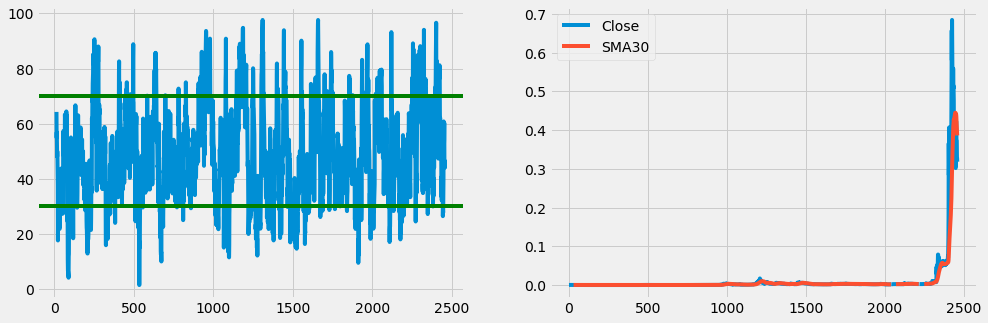

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax0 = RSI.plot(ax=ax[0])
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
df[["Close", "SMA30"]].plot(ax=ax[1])